In [90]:
x = [0.1, 1.1, 2.6,3.3,4.9,5.2,6.5,7.3,8.5,9.3]
y = [0,0,0,0,0,0,1,1,1,1]
theta = [0,5,10]


def classifier(x, theta):
    if x < theta:
        return 0
    elif x >= theta:
        return 1


yhat_0 = []
for i in x:
    yhat_0.append(classifier(i,0))
print(yhat_0)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [91]:
yhat_5 = []
for i in x:
    yhat_5.append(classifier(i,5))
print(yhat_5)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [92]:
yhat_10 = []
for i in x:
    yhat_10.append(classifier(i,10))
print(yhat_10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [93]:
TP = 0
FP = 0
FN = 0
TN = 0
for i,j in zip(y,yhat_5):
        print(i,j)
        if i == 1 and j == 1:
            TP += 1
        elif i == 0 and j == 0:
            TN += 1
        elif i == 1 and j == 0:
            FN += 1
        elif i == 0 and j == 1:
            FP +=1
print(TP, FP, FN, TN)

0 0
0 0
0 0
0 0
0 0
0 1
1 1
1 1
1 1
1 1
4 1 0 5


In [94]:
def true_posNeg_rate(y, yhat):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i,j in zip(y,yhat):
        if i==j and i == 1 and j == 1:
            TP += 1
        elif i == j and i == 0 and j == 0:
            TN += 1
        elif i == 1 and j == 0:
            FN += 1
        elif i == 0 and j == 1:
            FP +=1
            
    return TP, FP, FN, TN
TP, FP, FN, TN = true_posNeg_rate(y,yhat_5)
print(TP, FP, FN, TN)

4 1 0 5


In [95]:
def accuracy(TP, FP, FN, TN):
    return((TP+TN)/(TP+FP+FN+TN))
acc_5 = accuracy(TP, FP, FN, TN)
print(acc_5)

0.9


In [96]:
def sensitivity(TP, FN):
    return(TP/(TP+FN))
TPR_5 = sensitivity(TP, FN)
print(TPR_5)

1.0


In [97]:
def specificity(TN, FP):
    return(TN/(TN+FP))
TNR_5 = specificity(TN, FP)
print(TNR_5)

0.8333333333333334


In [98]:
def precision(TP, FP):
    return(TP/(TP+FP))
PPV_5 = precision(TP, FP)
print(PPV_5)

0.8


In [102]:
# for theta between 0,10
    # calculate yhat
    # calculate TPR
    # calculate FPR
# draw plot of [FPR, TPR] for all thetas
theta = range(0,10,1)
TPR = []
FPR = []
for t in theta:
    yhat = []
    for i in x:
        yhat.append(classifier(i,t))
    
    TP, FP, FN, TN = true_posNeg_rate(y,yhat)
    
    TPR.append(sensitivity(TP, FN))
    FPR.append(1-specificity(TN, FP))

print(theta) 
print(TPR)
print(FPR)

range(0, 10)
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 0.25]
[1.0, 0.8333333333333334, 0.6666666666666667, 0.5, 0.33333333333333337, 0.16666666666666663, 0.0, 0.0, 0.0, 0.0]


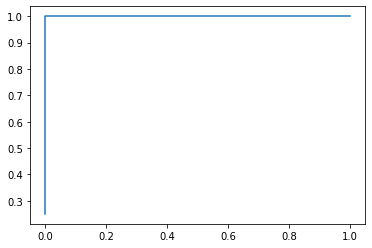

In [103]:
import matplotlib.pyplot as plt
plt.plot(FPR, TPR)

[0, 5, 10]